# Activation function visualisation

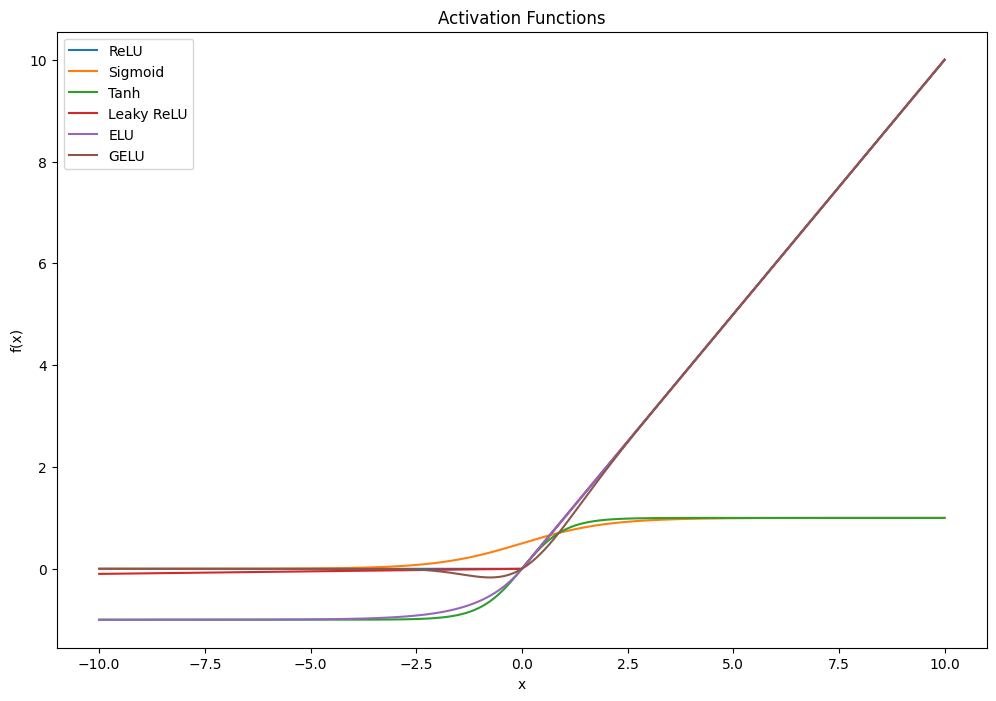

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erf
import os

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

x = np.linspace(-10, 10, 1000)

activation_functions = {
    'ReLU': relu,
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'Leaky ReLU': leaky_relu,
    'ELU': elu,
    'GELU': gelu
}

# Ensure the 'visual_outputs' directory exists
if not os.path.exists('visual_outputs'):
    os.makedirs('visual_outputs')

# Create individual plots
for name, func in activation_functions.items():
    plt.figure()
    plt.plot(x, func(x))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(name)
    plt.savefig(f'visual_outputs/{name}.png')
    plt.close()

# Create combined plot
plt.figure(figsize=(12, 8))
for name, func in activation_functions.items():
    plt.plot(x, func(x), label=name)

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions')
plt.savefig('visual_outputs/activation_functions.png')
plt.show()


# Loss function visualisation

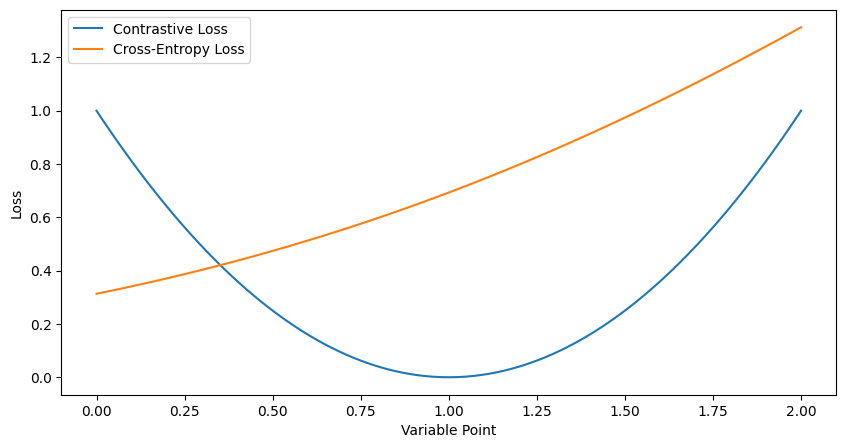

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# Contrastive Loss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = (output1 - output2).pow(2).sum(1)
        loss_contrastive = torch.mean((1 - label) * euclidean_distance +
                                      (label) * torch.clamp(self.margin - euclidean_distance, min=0.0))

        return loss_contrastive


# Cross-Entropy Loss
cross_entropy_loss = nn.CrossEntropyLoss()

# Generate sample data
fixed_point = np.array([1.0])
variable_points = np.linspace(0, 2, num=100)

# Calculate Contrastive Loss for each pair of points
contrastive_losses = []
contrastive_loss_function = ContrastiveLoss(margin=1.0)
for variable_point in variable_points:
    output1 = torch.tensor([fixed_point], requires_grad=True)
    output2 = torch.tensor([[variable_point]], requires_grad=True)
    label = torch.tensor([0.0], requires_grad=True)
    loss = contrastive_loss_function(output1, output2, label)
    contrastive_losses.append(loss.item())

# Calculate Cross-Entropy Loss for each pair of points
cross_entropy_losses = []
cross_entropy_loss_function = nn.CrossEntropyLoss()
for variable_point in variable_points:
    output = torch.tensor([[fixed_point[0], variable_point]], requires_grad=True)
    target = torch.tensor([0], dtype=torch.long, requires_grad=False)
    loss = cross_entropy_loss_function(output, target)
    cross_entropy_losses.append(loss.item())

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(variable_points, contrastive_losses, label='Contrastive Loss')
plt.plot(variable_points, cross_entropy_losses, label='Cross-Entropy Loss')
plt.xlabel('Variable Point')
plt.ylabel('Loss')
plt.legend()
plt.show()
